<a href="https://colab.research.google.com/github/HumayDS/Big-data-analysis/blob/main/Lesson_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Datalari oxuduruq, lazimsiz unnamed columnu silirik
import numpy as np
import pandas as pd
bikes = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/bikes_big_dt.csv',index_col=False)
bikeshop = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/bikeshop_big_dt.csv', index_col=False)
orderlines = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/orderlines_big_dt.csv', index_col=False)
bikes.drop('Unnamed: 0' , axis =1 , inplace = True)
bikeshop.drop('Unnamed: 0' , axis =1 , inplace = True)
orderlines.drop('Unnamed: 0' , axis =1 , inplace = True)

In [ ]:
# Bikes- Velosipedler haqqinda melumatlara baxaq

bikes.head()


,product.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260


In [ ]:
## Velosipedler satilan magazalar haqqinda melumatlar
bikeshop.head()

,customer.id,bikeshop.name,location
0,1,Pittsburgh Mountain Machines,"Pittsburgh, PA"
1,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,3,Columbus Race Equipment,"Columbus, OH"
3,4,Detroit Cycles,"Detroit, MI"
4,5,Cincinnati Speed,"Cincinnati, OH"


In [ ]:
##Orderlines - satishlar haqqinda melumatlar
orderlines.head()

,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,2011-01-07,2,48,1
1,1,2,2011-01-07,2,52,1
2,2,1,2011-01-10,10,76,1
3,2,2,2011-01-10,10,52,1
4,3,1,2011-01-10,6,2,1


In [ ]:
# Bikes ve orderlines setlerini product.id key columna görə birləşdirirəm
bikes_orderlines = pd.merge(bikes, orderlines, how = 'left', on = 'product.id')
bikes_orderlines.head()


,product.id,model,description,price,order.id,order.line,order.date,customer.id,quantity
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1


In [ ]:
orderlines.shape

(15644, 6)

In [ ]:
bikes_orderlines.shape

(15644, 9)

In [ ]:
# yaratdigim merged setle bikeshop haqqqinda melumatari birlesdirirem

bikes_merged = pd.merge(bikes_orderlines, bikeshop, how='left', on='customer.id')
bikes_merged.head()

,product.id,model,description,price,order.id,order.line,order.date,customer.id,quantity,bikeshop.name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [ ]:
## Dataseti df adlandırıram
df = bikes_merged

In [ ]:
##tipleri haqqinda melumatlara baxiram
bikes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product.id     15644 non-null  int64 
 1   model          15644 non-null  object
 2   description    15644 non-null  object
 3   price          15644 non-null  int64 
 4   order.id       15644 non-null  int64 
 5   order.line     15644 non-null  int64 
 6   order.date     15644 non-null  object
 7   customer.id    15644 non-null  int64 
 8   quantity       15644 non-null  int64 
 9   bikeshop.name  15644 non-null  object
 10  location       15644 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# datasetde unikal deyerlerin sayina baxiram
df.nunique()


product.id         97
model              97
description        13
price              53
order.id         2000
order.line         30
order.date        962
customer.id        30
quantity           10
bikeshop.name      30
location           30
dtype: int64

In [ ]:
#Deyisenlerin unikal deyerlerinin siyahisina baxiram
df['location'].unique()

array(['Louisville, KY', 'Oklahoma City, OK', 'Portland, OR',
       'Cincinnati, OH', 'Tampa, FL', 'New Orleans, LA', 'Ann Arbor, MI',
       'San Antonio, TX', 'Ithaca, NY', 'Miami, FL', 'Las Vegas, NV',
       'Providence, RI', 'Albuquerque, NM', 'San Francisco, CA',
       'Austin, TX', 'Wichita, KS', 'Phoenix, AZ', 'Denver, CO',
       'Detroit, MI', 'Minneapolis, MN', 'Kansas City, KS',
       'New York, NY', 'Pittsburgh, PA', 'Indianapolis, IN',
       'Nashville, TN', 'Philadelphia, PA', 'Seattle, WA', 'Columbus, OH',
       'Dallas, TX', 'Los Angeles, CA'], dtype=object)

In [ ]:
#sutun adlarina baxiram
df.columns

Index(['product.id', 'model', 'description', 'price', 'order.id', 'order.line',
       'order.date', 'customer.id', 'quantity', 'bikeshop.name', 'location'],
      dtype='object')

In [ ]:
# Sutun adlarinda noqteni _ evezlesdirirem
df.columns = df.columns.str.replace('.', '_')
df.columns


<ipython-input-14-f75ac66ec44d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


Index(['product_id', 'model', 'description', 'price', 'order_id', 'order_line',
       'order_date', 'customer_id', 'quantity', 'bikeshop_name', 'location'],
      dtype='object')

In [ ]:
#dataseti yoxlayiram
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [ ]:
# order_date- i time formatina getiriremn

df['order_date'] = pd.to_datetime(df['order_date'])
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [ ]:
#yoxlayiram
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     15644 non-null  int64         
 1   model          15644 non-null  object        
 2   description    15644 non-null  object        
 3   price          15644 non-null  int64         
 4   order_id       15644 non-null  int64         
 5   order_line     15644 non-null  int64         
 6   order_date     15644 non-null  datetime64[ns]
 7   customer_id    15644 non-null  int64         
 8   quantity       15644 non-null  int64         
 9   bikeshop_name  15644 non-null  object        
 10  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [ ]:
#extract day of week from order_date

df['day_of_week'] = df['order_date'].dt.day_name()


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",Monday
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",Thursday
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",Monday
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday


In [ ]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.week


<ipython-input-21-4fad7bec8e55>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['order_date'].dt.week


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",Monday,2011,1,2
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,1,4
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",Thursday,2011,2,7
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",Monday,2011,2,8
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,2,8


In [ ]:
# yeni gelir sutunu yaradiram qiymeti sayina vururam

df['revenue'] = df['price'] * df['quantity']


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",Monday,2011,1,2,12790
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,1,4,12790
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",Thursday,2011,2,7,12790
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",Monday,2011,2,8,12790
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,2,8,12790


In [ ]:
# heftenin gunlerine gore ortalama satisi qruplasdiriram

day_of_week = df.groupby(['day_of_week'])['revenue'].mean()
day_of_week.head()

day_of_week
Friday       4346.879712
Monday       4515.026121
Thursday     4681.000720
Tuesday      4648.354000
Wednesday    4481.237988
Name: revenue, dtype: float64

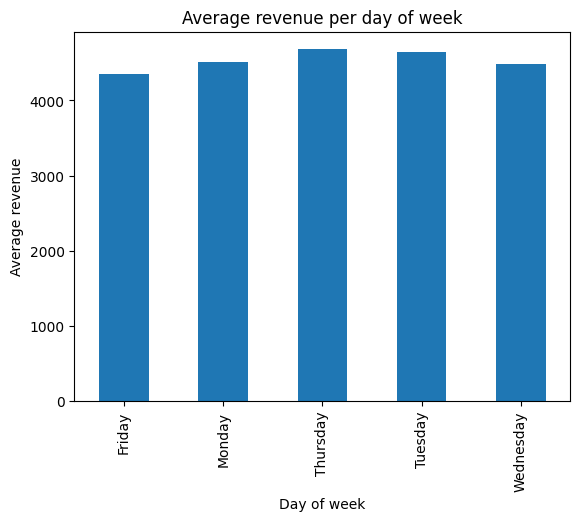

In [ ]:
#vizuallasdiriram

import matplotlib.pyplot as plt

day_of_week.plot.bar()
plt.title('Average revenue per day of week')
plt.xlabel('Day of week')
plt.ylabel('Average revenue')
plt.show()


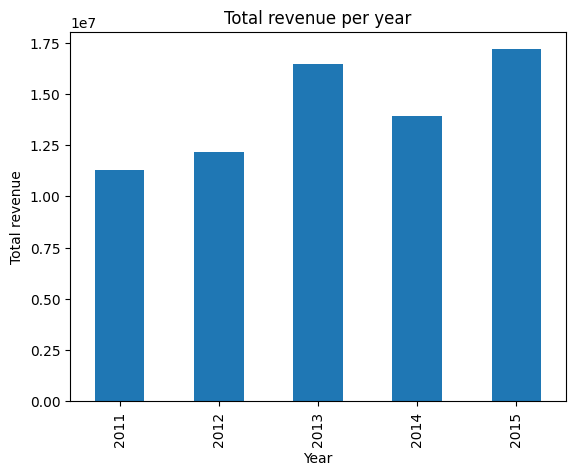

In [ ]:
# iller uzre satishlara,tendensiyaya baxiram

df.groupby(['year'])['revenue'].sum().plot.bar()
plt.title('Total revenue per year')
plt.xlabel('Year')
plt.ylabel('Total revenue')
plt.show()


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",Monday,2011,1,2,12790
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,1,4,12790
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",Thursday,2011,2,7,12790
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",Monday,2011,2,8,12790
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",Tuesday,2011,2,8,12790


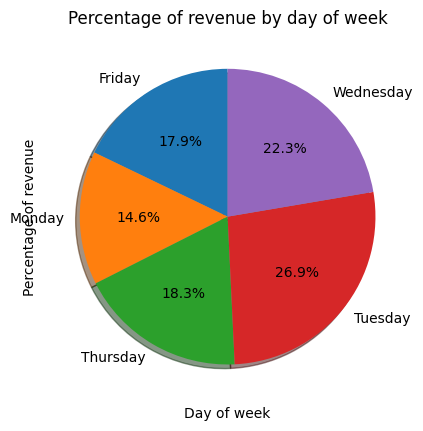

In [ ]:
# heftenin gunleri uzre satis faizlerine pie chartla baxiram

df.groupby(['day_of_week'])['revenue'].sum().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of revenue by day of week')
plt.xlabel('Day of week')
plt.ylabel('Percentage of revenue')
plt.show()


In [ ]:
# dataseti revenu sutununa gore coxdan aza duzurem

df = df.sort_values(by='revenue', ascending=False)
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,106600
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,102320
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540


In [ ]:
# Her bir magazada cemi satishlari qruplasdiriram, total_revenue gore coxdan aza siralayiram

df2 = df.groupby(['bikeshop_name'])['revenue'].sum().reset_index().rename(columns={'revenue': 'total_revenue'}).sort_values(by='total_revenue', ascending=False)
df2.head()

,bikeshop_name,total_revenue
10,Kansas City 29ers,11535455
6,Denver Bike Shop,7697670
9,Ithaca Mountain Climbers,6299335
21,Phoenix Bi-peds,4168535
19,Oklahoma City Race Equipment,3450040


In [ ]:
# magazalar uzre edilen satisin faiz nisbeti

df2['percentage_total_revenue'] = ((df2['total_revenue'] / df['revenue'].sum()) * 100).apply(lambda x: '{0:.2f}%'.format(x))
df2.head(20)


,bikeshop_name,total_revenue,percentage_total_revenue
10,Kansas City 29ers,11535455,16.24%
6,Denver Bike Shop,7697670,10.84%
9,Ithaca Mountain Climbers,6299335,8.87%
21,Phoenix Bi-peds,4168535,5.87%
19,Oklahoma City Race Equipment,3450040,4.86%
11,Las Vegas Cycles,3073615,4.33%
17,New Orleans Velocipedes,2761825,3.89%
29,Wichita Speed,2380385,3.35%
14,Miami Race Equipment,2057130,2.90%
15,Minneapolis Bike Shop,2023220,2.85%


In [ ]:
###tekstleri balaca veya boyuk herflerle yazdir
#df2['bikeshop_name'].str.upper()
df2['bikeshop_name'].str.lower()

10               kansas city 29ers
6                 denver bike shop
9         ithaca mountain climbers
21                 phoenix bi-peds
19    oklahoma city race equipment
11                las vegas cycles
17         new orleans velocipedes
29                   wichita speed
14            miami race equipment
15           minneapolis bike shop
1                  ann arbor speed
23                portland bi-peds
13       louisville race equipment
3                 cincinnati speed
4          columbus race equipment
22    pittsburgh mountain machines
26          san francisco cruisers
7                   detroit cycles
24              providence bi-peds
18                 new york cycles
16              nashville cruisers
0               albuquerque cycles
28                     tampa 29ers
12              los angeles cycles
8         indianapolis velocipedes
20          philadelphia bike shop
2                  austin cruisers
5                    dallas cycles
25           san ant

In [ ]:
##Yadda saxla
df2['bikeshop_name'] = df2['bikeshop_name'].str.lower()
df2.head()

,bikeshop_name,total_revenue,percentage_total_revenue
10,kansas city 29ers,11535455,16.24%
6,denver bike shop,7697670,10.84%
9,ithaca mountain climbers,6299335,8.87%
21,phoenix bi-peds,4168535,5.87%
19,oklahoma city race equipment,3450040,4.86%


In [ ]:
# Tekst tipli deyiseni ayirici ile ayir

new = df['location'].str.split(',', n = 1,expand = True)
new.head()

,0,1
151,Ann Arbor,MI
23,Ann Arbor,MI
12937,Albuquerque,NM
8958,Columbus,OH
8948,Albuquerque,NM


In [ ]:
df['City'] = new[0]

In [ ]:
df['Shtat'] = new[1]

In [ ]:
#df-e ayirdigimiz sutunlari elave ele
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,106600,Ann Arbor,MI
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,102320,Ann Arbor,MI
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750,Albuquerque,NM
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540,Columbus,OH
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540,Albuquerque,NM


In [ ]:
# str replace metodu

df['location'].replace('Ann Arbor, MI', 'Anna', inplace=True)



In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,Anna,Thursday,2012,3,12,106600,Ann Arbor,MI
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,Anna,Thursday,2012,3,12,102320,Ann Arbor,MI
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750,Albuquerque,NM
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540,Columbus,OH
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540,Albuquerque,NM


In [ ]:
# prompt: df reset index

df.reset_index(drop=True,inplace=True)


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,Anna,Thursday,2012,3,12,106600,Ann Arbor,MI
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,Anna,Thursday,2012,3,12,102320,Ann Arbor,MI
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750,Albuquerque,NM
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540,Columbus,OH
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540,Albuquerque,NM


In [ ]:
# str replace

df['location'].replace('Anna', 'Ann Arbor, MI', inplace=True)

In [ ]:
# df-i setirler uzre kes

df_3 = df.iloc[200:400]


In [ ]:
# df-den hemin setirleri silirem

df.drop(df.index[200:400], inplace=True)


In [ ]:
#df-in olcusunu yoxla
df.shape

(15444, 18)

In [ ]:
#kesdiyim df-in olcuune bax
df_3.shape

(200, 18)

In [ ]:
# sutun bashliqlari eyni oldugu ucun setirler uzre df-leri birlesdirirem

df = pd.concat([df,df_3],ignore_index=True)
df.shape

(15644, 18)

In [ ]:
#yeni df yaradiram df-in icindeki shtati secirem
df3 = df['Shtat']

In [ ]:
df3.head()

0     MI
1     MI
2     NM
3     OH
4     NM
Name: Shtat, dtype: object

In [ ]:
#df-den shtati silirem
df.drop('Shtat', axis = 1, inplace = True)

In [ ]:
df.shape

(15644, 17)

In [ ]:
df3.shape

(15644,)

In [ ]:
# sutunlar uzre yeni yaratdigim df-i ve evvelki df-birlesdiriren
df = pd.concat([df, df3], axis=1)


In [ ]:
#olculer duzeldi
df.shape

(15644, 18)

In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,106600,Ann Arbor,MI
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,102320,Ann Arbor,MI
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750,Albuquerque,NM
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540,Columbus,OH
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540,Albuquerque,NM


In [ ]:
# qiymeti describe edirem
df['price'].describe()


count    15644.000000
mean      3521.110969
std       2667.194590
min        415.000000
25%       1840.000000
50%       2700.000000
75%       4260.000000
max      12790.000000
Name: price, dtype: float64

In [ ]:
# df-in icinde yeni price group yaradiram, qiymeti 415-1840 arasi olanlara az, 1840-2700 arasi orta, digherlerine cox yazdiriram

df['price_group'] = np.where((df['price'] >= 415) & (df['price'] <= 1840), 'az', np.where((df['price'] > 1840) & (df['price'] <= 2700), 'orta', 'cox'))


In [ ]:
df.tail()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat,price_group
15639,54,Trigger Carbon 4,Mountain - Over Mountain - Carbon,3200,768,3,2013-04-04,5,5,Cincinnati Speed,"Cincinnati, OH",Thursday,2013,4,14,16000,Cincinnati,OH,cox
15640,7,Supersix Evo Ultegra 3,Road - Elite Road - Carbon,3200,135,6,2011-05-18,9,5,Minneapolis Bike Shop,"Minneapolis, MN",Wednesday,2011,5,20,16000,Minneapolis,MN,cox
15641,59,Scalpel-Si Carbon 3,Mountain - Cross Country Race - Carbon,5330,637,1,2012-11-15,2,3,Ithaca Mountain Climbers,"Ithaca, NY",Thursday,2012,11,46,15990,Ithaca,NY,cox
15642,25,Synapse Hi-Mod Disc Ultegra,Road - Endurance Road - Carbon,5330,713,10,2013-03-04,19,3,San Francisco Cruisers,"San Francisco, CA",Monday,2013,3,10,15990,San Francisco,CA,cox
15643,83,Habit Carbon 2,Mountain - Trail - Carbon,5330,1545,6,2015-02-10,2,3,Ithaca Mountain Climbers,"Ithaca, NY",Tuesday,2015,2,7,15990,Ithaca,NY,cox


In [ ]:
# orta qiynmet qrupunda olanlari filtleyirem
df.loc[df['price_group'] == 'orta']


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat,price_group
121,41,Slice Ultegra,Road - Triathalon - Carbon,2700,696,5,2013-02-08,27,10,San Antonio Bike Shop,"San Antonio, TX",Friday,2013,2,6,27000,San Antonio,TX,orta
126,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,1862,3,2015-08-18,22,10,Ann Arbor Speed,"Ann Arbor, MI",Tuesday,2015,8,34,26600,Ann Arbor,MI,orta
179,44,SuperX Ultegra,Road - Cyclocross - Carbon,2450,152,9,2011-06-08,13,10,Oklahoma City Race Equipment,"Oklahoma City, OK",Wednesday,2011,6,23,24500,Oklahoma City,OK,orta
185,41,Slice Ultegra,Road - Triathalon - Carbon,2700,712,23,2013-02-28,23,9,Philadelphia Bike Shop,"Philadelphia, PA",Thursday,2013,2,9,24300,Philadelphia,PA,orta
186,41,Slice Ultegra,Road - Triathalon - Carbon,2700,1185,11,2014-04-03,10,9,Kansas City 29ers,"Kansas City, KS",Thursday,2014,4,14,24300,Kansas City,KS,orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15570,72,F-Si 2,Mountain - Cross Country Race - Aluminum,2060,723,10,2013-03-11,16,9,Phoenix Bi-peds,"Phoenix, AZ",Monday,2013,3,11,18540,Phoenix,AZ,orta
15609,75,Fat CAAD2,Mountain - Fat Bike - Aluminum,2130,111,9,2011-04-26,10,8,Kansas City 29ers,"Kansas City, KS",Tuesday,2011,4,17,17040,Kansas City,KS,orta
15612,33,Synapse Disc Adventure,Road - Endurance Road - Aluminum,2130,621,4,2012-10-23,25,8,New Orleans Velocipedes,"New Orleans, LA",Tuesday,2012,10,43,17040,New Orleans,LA,orta
15627,41,Slice Ultegra,Road - Triathalon - Carbon,2700,1241,25,2014-05-14,25,6,New Orleans Velocipedes,"New Orleans, LA",Wednesday,2014,5,20,16200,New Orleans,LA,orta


In [ ]:
#df-e ad sutunu elave edirem, yalniz _bikes yazilacaqq
df['add'] = 'bikes'


In [ ]:
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,day_of_week,year,month,week,revenue,City,Shtat,price_group,add
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,"Ann Arbor, MI",Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes


In [ ]:
# df-e quantity stat sutunu elave edirem, price  - price gropu tire ile birlesdirirem

df['quantity_shtat'] = df['price'].astype(str) + ' - ' +  df['price_group']


In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,day_of_week,year,month,week,revenue,City,Shtat,price_group,add,quantity_shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,...,Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,...,Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,...,Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,...,Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox


In [ ]:
#column adlarina suffix elave edirem
df.columns += 'a1'
df

,product_ida1,modela1,descriptiona1,pricea1,order_ida1,order_linea1,order_datea1,customer_ida1,quantitya1,bikeshop_namea1,...,day_of_weeka1,yeara1,montha1,weeka1,revenuea1,Citya1,Shtata1,price_groupa1,adda1,quantity_shtata1
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,...,Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,...,Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,...,Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,...,Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,54,Trigger Carbon 4,Mountain - Over Mountain - Carbon,3200,768,3,2013-04-04,5,5,Cincinnati Speed,...,Thursday,2013,4,14,16000,Cincinnati,OH,cox,bikes,3200 - cox
15640,7,Supersix Evo Ultegra 3,Road - Elite Road - Carbon,3200,135,6,2011-05-18,9,5,Minneapolis Bike Shop,...,Wednesday,2011,5,20,16000,Minneapolis,MN,cox,bikes,3200 - cox
15641,59,Scalpel-Si Carbon 3,Mountain - Cross Country Race - Carbon,5330,637,1,2012-11-15,2,3,Ithaca Mountain Climbers,...,Thursday,2012,11,46,15990,Ithaca,NY,cox,bikes,5330 - cox
15642,25,Synapse Hi-Mod Disc Ultegra,Road - Endurance Road - Carbon,5330,713,10,2013-03-04,19,3,San Francisco Cruisers,...,Monday,2013,3,10,15990,San Francisco,CA,cox,bikes,5330 - cox


In [ ]:
# suffixi sil
df.columns = df.columns.str.rstrip('a1')
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,day_of_week,year,month,week,revenue,City,Shtat,price_group,add,quantity_shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,...,Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,...,Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,...,Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,...,Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox


In [ ]:
# bikeshopname ve sayi

a = df.groupby('bikeshop_name')['bikeshop_name'].count()
a

bikeshop_name
Albuquerque Cycles               207
Ann Arbor Speed                  461
Austin Cruisers                  192
Cincinnati Speed                 298
Columbus Race Equipment          296
Dallas Cycles                    182
Denver Bike Shop                1801
Detroit Cycles                   373
Indianapolis Velocipedes         231
Ithaca Mountain Climbers         975
Kansas City 29ers               2731
Las Vegas Cycles                 470
Los Angeles Cycles               247
Louisville Race Equipment        326
Miami Race Equipment             567
Minneapolis Bike Shop            504
Nashville Cruisers               285
New Orleans Velocipedes          721
New York Cycles                  328
Oklahoma City Race Equipment     882
Philadelphia Bike Shop           191
Phoenix Bi-peds                 1086
Pittsburgh Mountain Machines     278
Portland Bi-peds                 495
Providence Bi-peds               434
San Antonio Bike Shop            145
San Francisco Cruisers  

In [ ]:
# bikeshop name ve mebleg cemi
b = df.groupby(['bikeshop_name'])['revenue'].sum()
b

bikeshop_name
Albuquerque Cycles               1002880
Ann Arbor Speed                  1973910
Austin Cruisers                   688885
Cincinnati Speed                 1859035
Columbus Race Equipment          1767005
Dallas Cycles                     681080
Denver Bike Shop                 7697670
Detroit Cycles                   1637845
Indianapolis Velocipedes          941005
Ithaca Mountain Climbers         6299335
Kansas City 29ers               11535455
Las Vegas Cycles                 3073615
Los Angeles Cycles                962050
Louisville Race Equipment        1934800
Miami Race Equipment             2057130
Minneapolis Bike Shop            2023220
Nashville Cruisers               1072925
New Orleans Velocipedes          2761825
New York Cycles                  1374625
Oklahoma City Race Equipment     3450040
Philadelphia Bike Shop            774550
Phoenix Bi-peds                  4168535
Pittsburgh Mountain Machines     1755420
Portland Bi-peds                 1972130
Pr

In [ ]:
# bikeshopname ve ilk sifaris tarixi

c = df.groupby(['bikeshop_name'])['order_date'].min()
c

bikeshop_name
Albuquerque Cycles             2011-01-24
Ann Arbor Speed                2011-01-11
Austin Cruisers                2011-03-23
Cincinnati Speed               2011-01-26
Columbus Race Equipment        2011-02-09
Dallas Cycles                  2011-06-21
Denver Bike Shop               2011-01-11
Detroit Cycles                 2011-05-13
Indianapolis Velocipedes       2011-04-22
Ithaca Mountain Climbers       2011-01-07
Kansas City 29ers              2011-01-10
Las Vegas Cycles               2011-02-01
Los Angeles Cycles             2011-04-29
Louisville Race Equipment      2011-01-10
Miami Race Equipment           2011-05-03
Minneapolis Bike Shop          2011-01-12
Nashville Cruisers             2011-01-20
New Orleans Velocipedes        2011-01-17
New York Cycles                2011-03-08
Oklahoma City Race Equipment   2011-01-25
Philadelphia Bike Shop         2011-06-17
Phoenix Bi-peds                2011-01-11
Pittsburgh Mountain Machines   2011-03-28
Portland Bi-peds    

In [ ]:
# a b c birlesdir
d = pd.concat([a, b, c], axis=1)
d.reset_index = True
d

,bikeshop_name,revenue,order_date
bikeshop_name,,,
Albuquerque Cycles,207,1002880,2011-01-24
Ann Arbor Speed,461,1973910,2011-01-11
Austin Cruisers,192,688885,2011-03-23
Cincinnati Speed,298,1859035,2011-01-26
Columbus Race Equipment,296,1767005,2011-02-09
Dallas Cycles,182,681080,2011-06-21
Denver Bike Shop,1801,7697670,2011-01-11
Detroit Cycles,373,1637845,2011-05-13
Indianapolis Velocipedes,231,941005,2011-04-22


In [ ]:
# column adi deyis

d.rename(columns={'bikeshop_name': 'count_bikeshop_name'}, inplace=True)
d

,count_bikeshop_name,revenue,order_date
bikeshop_name,,,
Albuquerque Cycles,207,1002880,2011-01-24
Ann Arbor Speed,461,1973910,2011-01-11
Austin Cruisers,192,688885,2011-03-23
Cincinnati Speed,298,1859035,2011-01-26
Columbus Race Equipment,296,1767005,2011-02-09
Dallas Cycles,182,681080,2011-06-21
Denver Bike Shop,1801,7697670,2011-01-11
Detroit Cycles,373,1637845,2011-05-13
Indianapolis Velocipedes,231,941005,2011-04-22


In [ ]:
# revenue 10 % azalt

d['revenue'] = d['revenue'] * 0.9


In [ ]:
d

,count_bikeshop_name,revenue,order_date
bikeshop_name,,,
Albuquerque Cycles,207,902592.0,2011-01-24
Ann Arbor Speed,461,1776519.0,2011-01-11
Austin Cruisers,192,619996.5,2011-03-23
Cincinnati Speed,298,1673131.5,2011-01-26
Columbus Race Equipment,296,1590304.5,2011-02-09
Dallas Cycles,182,612972.0,2011-06-21
Denver Bike Shop,1801,6927903.0,2011-01-11
Detroit Cycles,373,1474060.5,2011-05-13
Indianapolis Velocipedes,231,846904.5,2011-04-22


In [ ]:
df

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,day_of_week,year,month,week,revenue,City,Shtat,price_group,add,quantity_shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,...,Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,...,Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,...,Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,...,Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,54,Trigger Carbon 4,Mountain - Over Mountain - Carbon,3200,768,3,2013-04-04,5,5,Cincinnati Speed,...,Thursday,2013,4,14,16000,Cincinnati,OH,cox,bikes,3200 - cox
15640,7,Supersix Evo Ultegra 3,Road - Elite Road - Carbon,3200,135,6,2011-05-18,9,5,Minneapolis Bike Shop,...,Wednesday,2011,5,20,16000,Minneapolis,MN,cox,bikes,3200 - cox
15641,59,Scalpel-Si Carbon 3,Mountain - Cross Country Race - Carbon,5330,637,1,2012-11-15,2,3,Ithaca Mountain Climbers,...,Thursday,2012,11,46,15990,Ithaca,NY,cox,bikes,5330 - cox
15642,25,Synapse Hi-Mod Disc Ultegra,Road - Endurance Road - Carbon,5330,713,10,2013-03-04,19,3,San Francisco Cruisers,...,Monday,2013,3,10,15990,San Francisco,CA,cox,bikes,5330 - cox


In [ ]:
## Columbus seherinde 10% qiymete endirim var
df.loc[df['City'] == 'Columbus' , 'price'] *= 0.9

In [ ]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,day_of_week,year,month,week,revenue,City,Shtat,price_group,add,quantity_shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660.0,405,9,2012-03-22,22,10,Ann Arbor Speed,...,Thursday,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790.0,405,3,2012-03-22,22,8,Ann Arbor Speed,...,Thursday,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250.0,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,Thursday,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,8154.0,954,10,2013-07-30,3,9,Columbus Race Equipment,...,Tuesday,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060.0,846,7,2013-05-21,14,9,Albuquerque Cycles,...,Tuesday,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox


In [ ]:
# Numeric deyiskenleri sec ve korelyasiya matrisi cek

corr = df.select_dtypes('number').corr()
corr

,product_id,price,order_id,order_line,customer_id,quantity,year,month,week,revenue
product_id,1.000000,-0.154362,-0.003628,-0.007058,-0.154411,-0.007711,-0.002018,-0.003479,-0.002829,-0.107326
price,-0.154362,1.000000,0.000168,0.012058,-0.087321,-0.000125,0.005757,-0.025244,-0.027848,0.660202
order_id,-0.003628,0.000168,1.000000,0.008755,-0.044196,-0.023395,0.976273,0.164880,0.184099,-0.008422
order_line,-0.007058,0.012058,0.008755,1.000000,0.000281,0.002115,0.014632,-0.024869,-0.021846,0.007226
customer_id,-0.154411,-0.087321,-0.044196,0.000281,1.000000,0.001239,-0.048583,0.008956,0.013882,-0.059940
quantity,-0.007711,-0.000125,-0.023395,0.002115,0.001239,1.000000,-0.023257,-0.002273,-0.002634,0.601434
year,-0.002018,0.005757,0.976273,0.014632,-0.048583,-0.023257,1.000000,-0.040306,-0.019418,-0.003937
month,-0.003479,-0.025244,0.164880,-0.024869,0.008956,-0.002273,-0.040306,1.000000,0.982705,-0.019563
week,-0.002829,-0.027848,0.184099,-0.021846,0.013882,-0.002634,-0.019418,0.982705,1.000000,-0.021335
revenue,-0.107326,0.660202,-0.008422,0.007226,-0.059940,0.601434,-0.003937,-0.019563,-0.021335,1.000000


<Axes: >

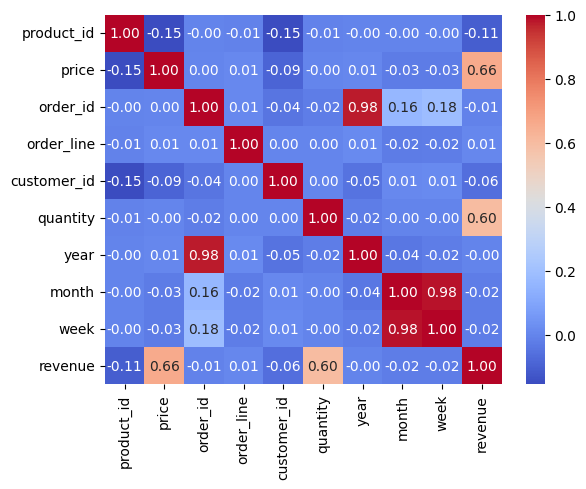

In [ ]:
#Heatmap cek
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot = True ,
            cmap = 'coolwarm' , fmt = '.2f')

In [ ]:
# $ isaresi elave ele

df['revenue$'] = '$' + df['revenue'].astype(str)
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,year,month,week,revenue,City,Shtat,price_group,add,quantity_shtat,revenue$
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660.0,405,9,2012-03-22,22,10,Ann Arbor Speed,...,2012,3,12,106600,Ann Arbor,MI,cox,bikes,10660 - cox,$106600
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790.0,405,3,2012-03-22,22,8,Ann Arbor Speed,...,2012,3,12,102320,Ann Arbor,MI,cox,bikes,12790 - cox,$102320
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250.0,1762,11,2015-06-11,14,7,Albuquerque Cycles,...,2015,6,24,85750,Albuquerque,NM,cox,bikes,12250 - cox,$85750
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,8154.0,954,10,2013-07-30,3,9,Columbus Race Equipment,...,2013,7,31,81540,Columbus,OH,cox,bikes,9060 - cox,$81540
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060.0,846,7,2013-05-21,14,9,Albuquerque Cycles,...,2013,5,21,81540,Albuquerque,NM,cox,bikes,9060 - cox,$81540


In [ ]:
# excel veya csv formatda yukle

df.to_excel('df.xlsx')

df.to_csv('df.csv')